In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [6]:
PARENT_DATA_PATH = "../data/testSet"
test_data = os.path.abspath(os.path.join(PARENT_DATA_PATH, "testSet.txt"))

df = pd.read_csv(test_data)

In [7]:
df

,PatientID,ImageFile,Hospital,Age,Sex,Temp_C,Cough,DifficultyInBreathing,WBC,CRP,Fibrinogen,LDH,Ddimer,Ox_percentage,PaO2,SaO2,pH,CardiovascularDisease,RespiratoryFailure,Prognosis
0,P_102,P_102.png,A,NaN,1.0,37.3,1.0,0.0,5.37,3.96,NaN,NaN,NaN,93.0,63.0,93.0,7.46,0.0,0.0,<undefined>
1,P_117,NaN,A,39.0,1.0,NaN,1.0,NaN,10.17,0.75,NaN,NaN,NaN,95.0,77.0,97.0,NaN,1.0,NaN,<undefined>
2,P_16,P_16.png,A,44.0,0.0,38.0,1.0,0.0,NaN,5.20,NaN,NaN,NaN,NaN,65.0,94.0,7.47,0.0,NaN,<undefined>
3,P_118,P_118.png,A,NaN,NaN,NaN,NaN,0.0,17.72,13.72,NaN,NaN,NaN,NaN,53.0,NaN,7.60,NaN,0.0,<undefined>
4,P_114,P_114.png,A,51.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,98.0,7.56,NaN,0.0,<undefined>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,P_88,NaN,A,58.0,0.0,36.7,1.0,0.0,5.14,NaN,NaN,NaN,NaN,NaN,89.0,99.0,7.56,1.0,0.0,<undefined>
116,P_92,P_92.png,A,48.0,0.0,37.4,NaN,NaN,5.17,2.60,NaN,178.0,NaN,88.0,83.0,NaN,7.42,1.0,NaN,<undefined>
117,P_86,P_86.png,A,87.0,0.0,37.5,NaN,NaN,8.10,20.76,NaN,NaN,NaN,89.0,60.0,93.0,7.43,1.0,0.0,<undefined>
118,P_9,P_9.png,A,70.0,1.0,38.0,0.0,1.0,3.61,9.52,NaN,NaN,552.0,NaN,41.0,77.0,7.44,1.0,NaN,<undefined>


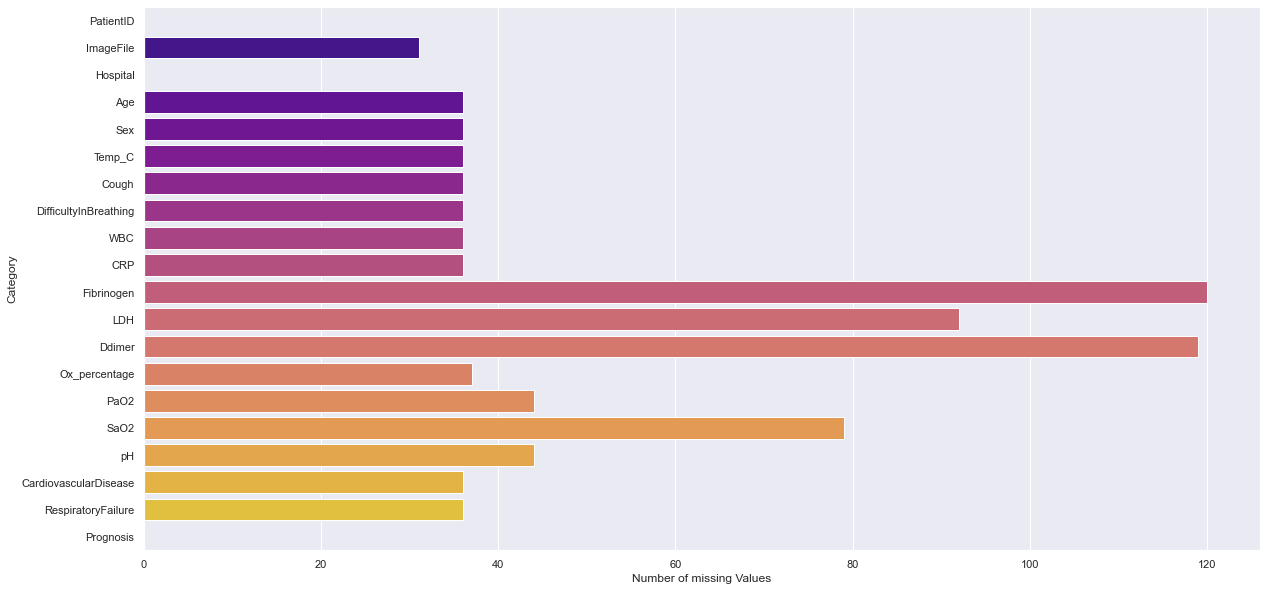

In [38]:
# get an overview about amount of missing data:
na_stats = []
for col in df.columns:
    na_stats.append((col, df[col].isna().sum()))
na_df = pd.DataFrame(na_stats)

# histplot of missing data:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.barplot(x=1, y=0, data=na_df, palette="plasma", ax=ax)
ax.set_xlabel("Number of missing Values")
ax.set_ylabel("Category")
plt.show()

In [39]:
df.describe()

,Age,Sex,Temp_C,Cough,DifficultyInBreathing,WBC,CRP,Fibrinogen,LDH,Ddimer,Ox_percentage,PaO2,SaO2,pH,CardiovascularDisease,RespiratoryFailure
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,0.0,28.000000,1.0,83.000000,76.000000,41.000000,76.000000,84.000000,84.000000
mean,60.773810,0.369048,37.629762,0.666667,0.523810,7.030714,7.491667,NaN,399.000000,552.0,92.915663,75.263158,95.195122,7.471974,0.428571,0.035714
std,15.417367,0.485445,1.130602,0.474236,0.502432,2.796963,7.253262,NaN,201.745898,NaN,5.046624,22.948852,4.069518,0.054797,0.497844,0.186691
min,27.000000,0.000000,36.000000,0.000000,0.000000,2.300000,0.140000,NaN,145.000000,552.0,70.000000,32.000000,77.000000,7.280000,0.000000,0.000000
25%,49.000000,0.000000,36.700000,0.000000,0.000000,5.017500,1.742500,NaN,267.500000,552.0,90.000000,62.500000,93.000000,7.450000,0.000000,0.000000
50%,61.500000,0.000000,37.550000,1.000000,1.000000,6.375000,4.920000,NaN,412.000000,552.0,94.000000,71.000000,96.000000,7.470000,0.000000,0.000000
75%,72.500000,1.000000,38.325000,1.000000,1.000000,8.025000,11.870000,NaN,444.250000,552.0,97.000000,84.250000,98.000000,7.510000,1.000000,0.000000
max,95.000000,1.000000,41.500000,1.000000,1.000000,17.720000,28.420000,NaN,1159.000000,552.0,100.000000,175.000000,100.000000,7.600000,1.000000,1.000000


In [66]:
feature_df.iloc[1]

PatientID                       P_16
ImageFile                   P_16.png
Hospital                           A
Age                             44.0
Sex                              0.0
Temp_C                          38.0
Cough                            1.0
DifficultyInBreathing            0.0
WBC                              NaN
CRP                              5.2
Fibrinogen                       NaN
LDH                              NaN
Ddimer                           NaN
Ox_percentage                    NaN
PaO2                            65.0
SaO2                            94.0
pH                              7.47
CardiovascularDisease            0.0
RespiratoryFailure               NaN
Prognosis                <undefined>
Name: 2, dtype: object

In [71]:
feature_df = df[df['Temp_C'].notna()]
numerical = ["Age","Sex", "Cough","DifficultyInBreathing","WBC","CRP","Fibrinogen","LDH", "Ddimer", "Ox_percentage", "PaO2", "SaO2", "pH", "CardiovascularDisease", "RespiratoryFailure"]
X = feature_df[numerical]
y = feature_df['Temp_C']

# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=15)
model.fit(X, y)
# make a single prediction

yhat = model.predict(X.iloc[5])
print('Prediction: %d' % yhat[0])
print("Truth: ", y.iloc[5])

Prediction: 40
Truth:  40.0


In [78]:
importance = model.get_feature_importance(type= "FeatureImportance")

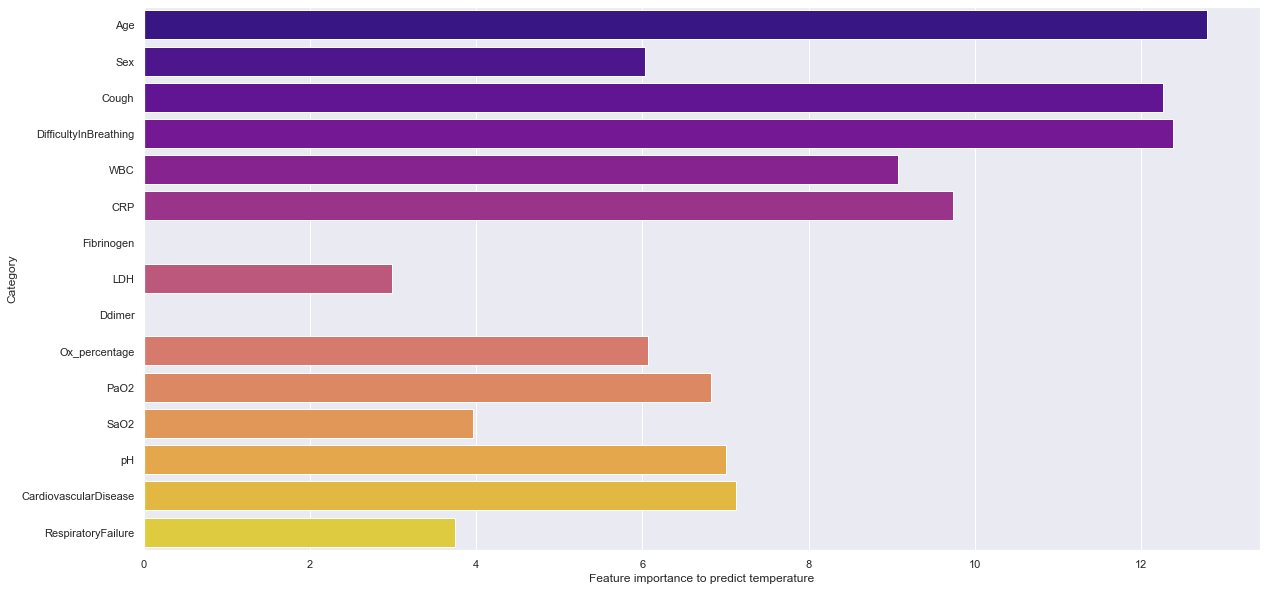

In [82]:

# histplot of missing data:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.barplot(x=importance, y=numerical, palette="plasma", ax=ax)
ax.set_xlabel("Feature importance to predict temperature")
ax.set_ylabel("Category")
plt.show()